# Inteligencia de Negocios: Laboratorio 1
## Integrantes: Grupo 17

* Mariana Díaz Arenas - [m.diaza2](mailto:m.diaza2@uniandes.edu.co) 
* Esteban Gonzales Ruales - [e.gonzalez5](mailto:e.gonzalez5@uniandes.edu.co) 
* Juan Diego Yepes - [j.yepes](mailto:j.yepes@uniandes.edu.co) 


En el siguiente cuaderno de Jupyter implementamos la solución al siguiente laboratorio propuesto: [link](https://gitlab.virtual.uniandes.edu.co/ISIS3301/laboratorios/blob/master/202310/Lab%201%20-%20Clustering/Laboratorio1_enunciado.md)

# 1. Entendimiento de los datos

In [1]:
# Importación de librerías y creación del dataFrame

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

df_roads = pd.read_csv("data/BiciAlpes.csv", index_col=False, encoding="latin1", sep=";")
df_roads = df_roads.iloc[:, :-1]

# Imprime el tamaño del dataframe
df_roads.shape

(5338, 14)

In [3]:
# Verificación de que se cargó correctamente
df_roads

Time  Number_of_Casualties    Day_of_Week  Road_Type  Speed_limit  \
0     Mañana                     1    Día laboral          6         30.0   
1     Mañana                     1    Día laboral          6         30.0   
2      Tarde                     1  Fin de semana          6         30.0   
3      Tarde                     2    Día laboral          6         30.0   
4     Mañana                     2    Día laboral          6         30.0   
...      ...                   ...            ...        ...          ...   
5333   Tarde                     1    Día laboral          6         20.0   
5334   Noche                     2    Día laboral          6         30.0   
5335   Tarde                     1    Día laboral          6         30.0   
5336   Noche                     1    Día laboral          6         30.0   
5337  Mañana                     1    Día laboral          3         70.0   

      Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                    1                   1                        1   
1                    1                   1                        1   
2                    1                   1                        1   
3                    1                   1                        1   
4                    1                   1                        1   
...                ...                 ...                      ...   
5333                 1                   1                        2   
5334                 1                   1                        1   
5335                 4                   5                        2   
5336                 1                   1                        1   
5337                 1                   1                        1   

      Urban_or_Rural_Area Vehicle_Type  \
0                       1         bike   
1                       1         bike   
2                       1         bike   
3                       1         bike   
4                       1         bike   
...                   ...          ...   
5333                    1         bike   
5334                    2         bike   
5335                    1         bike   
5336                    1         bike   
5337                    1         bike   

      Did_Police_Officer_Attend_Scene_of_Accident  Junction_Detail  \
0                                               1                3   
1                                               1                0   
2                                               1                3   
3                                               1                6   
4                                               1                6   
...                                           ...              ...   
5333                                            1                9   
5334                                            2                0   
5335                                            2                3   
5336                                            1                6   
5337                                            2                0   

      Number_of_Vehicles  Accident_Severity  
0                      1                  3  
1                      1                  3  
2                      1                  3  
3                      1                  2  
4                      1                  3  
...                  ...                ...  
5333                   1                  3  
5334                   1                  2  
5335                   1                  2  
5336                   1                  3  
5337                   1                  2  

[5338 rows x 14 columns]

In [4]:
# Completitud
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

In [5]:
# Unicidad
df_roads.loc[df_roads.duplicated(subset = df_roads.columns[1:], keep = False)].sort_values(by = "Time")

Time  Number_of_Casualties    Day_of_Week  Road_Type  Speed_limit  \
87    Madrugada                     1    Día laboral          6         30.0   
36    Madrugada                     1            NaN          6         30.0   
189   Madrugada                     1  Fin de semana          6         30.0   
514   Madrugada                     1    Día laboral          6         30.0   
3412     Mañana                     1    Día laboral          6         30.0   
...         ...                   ...            ...        ...          ...   
3602      Tarde                     2    Día laboral          6         30.0   
2638      Tarde                     2    Día laboral          6         30.0   
1312      Tarde                     1  Fin de semana          6         30.0   
1291      Tarde                     1    Día laboral          6         30.0   
1179      Tarde                     1    Día laboral          6         60.0   

      Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
87                   4                   1                        1   
36                   4                   1                        1   
189                  4                   1                        1   
514                  1                   1                        1   
3412                 1                   1                        1   
...                ...                 ...                      ...   
3602                 1                   1                        1   
2638                 4                   1                        1   
1312                 1                   1                        1   
1291                 1                   1                        2   
1179                 1                   8                        4   

      Urban_or_Rural_Area Vehicle_Type  \
87                      1         bike   
36                      1         bike   
189                     1         bike   
514                     1         bike   
3412                    2         bike   
...                   ...          ...   
3602                    1         bike   
2638                    1         bike   
1312                    1         bike   
1291                    1         bike   
1179                    2         bike   

      Did_Police_Officer_Attend_Scene_of_Accident  Junction_Detail  \
87                                              1                0   
36                                              1                0   
189                                             1                3   
514                                             1                9   
3412                                            1                0   
...                                           ...              ...   
3602                                            1                3   
2638                                            1                0   
1312                                            2                3   
1291                                            1                3   
1179                                            1                0   

      Number_of_Vehicles  Accident_Severity  
87                     1                  3  
36                     1                  3  
189                    1                  3  
514                    1                  3  
3412                   1                  2  
...                  ...                ...  
3602                   1                  3  
2638                   1                  2  
1312                   1                  3  
1291                   1                  2  
1179                   1                  2  

[4240 rows x 14 columns]

In [6]:
# Número de resgistros duplicados
# Tiene sentido tener todos estos valores repetidos? -> si porque podemos tener varios registros de la misma ruta pero en diferentes fechas
print('Total de registros repetidos:', df_roads.loc[df_roads.duplicated(subset = df_roads.columns, keep = False)].shape[0])

Total de registros repetidos: 3834


In [7]:
# Consistencia
#Revisar todos los features
df_roads.groupby(['Time', 'Day_of_Week']).size()

Time       Day_of_Week  
Madrugada  Día laboral         3
           Fin de semana       1
Mañana     Día laboral      1249
           Fin de semana     429
Noche      Día laboral      1041
           Fin de semana     428
Tarde      Día laboral      1539
           Fin de semana     629
dtype: int64

In [8]:
print(all(map(lambda x: x in [1, 2, 3, 6, 7, 9], df_roads["Road_Type"])))

True


In [9]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Accident_Severity"])))

True


In [10]:
print(all(map(lambda x: x >= 0, df_roads["Number_of_Vehicles"])))

True


In [11]:
print(all(map(lambda x: x >= 0, df_roads["Speed_limit"])))

True


In [12]:
print(all(map(lambda x: x in [-1, 0, 1, 2, 3, 5, 6, 7, 8, 9], df_roads["Junction_Detail"])))

True


In [13]:
print(all(map(lambda x: x >= 0, df_roads["Number_of_Casualties"])))

True


In [14]:
print(all(map(lambda x: x in [-1, 1, 4, 5, 6, 7], df_roads["Light_Conditions"])))

True


In [15]:
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], df_roads["Weather_Conditions"])))

True


In [16]:
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7], df_roads["Road_Surface_Conditions"])))

True


In [17]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Urban_or_Rural_Area"])))

True


In [18]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"])))

False


In [19]:
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

2


# 2. Preparacion de los Datos

In [21]:
# Quitamos las columnas que no necesitamos
df_roads = df_roads.drop(["Vehicle_Type"], axis=1)

In [22]:
df_roads = df_roads.drop(df_roads[df_roads["Did_Police_Officer_Attend_Scene_of_Accident"] == -1].index)

In [23]:
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

0


In [24]:
# Quitamos las columnas nulas
df_roads = df_roads.dropna(subset=["Day_of_Week"])

In [25]:
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Time                                           0.0
Number_of_Casualties                           0.0
Day_of_Week                                    0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Light_Conditions                               0.0
Weather_Conditions                             0.0
Road_Surface_Conditions                        0.0
Urban_or_Rural_Area                            0.0
Did_Police_Officer_Attend_Scene_of_Accident    0.0
Junction_Detail                                0.0
Number_of_Vehicles                             0.0
Accident_Severity                              0.0
dtype: float64

In [26]:
# Reemplazamos los valores no numéricos por valores numéricos para hacer el clustering
df_roads['Time'].replace({'Mañana': 1, 'Tarde': 2, 'Noche': 3, 'Madrugada': 4}, inplace = True)
df_roads['Day_of_Week'].replace({'Día laboral': 1, 'Fin de semana': 2}, inplace = True)

In [27]:
df_roads

Time  Number_of_Casualties  Day_of_Week  Road_Type  Speed_limit  \
0        1                     1            1          6         30.0   
1        1                     1            1          6         30.0   
2        2                     1            2          6         30.0   
3        2                     2            1          6         30.0   
4        1                     2            1          6         30.0   
...    ...                   ...          ...        ...          ...   
5333     2                     1            1          6         20.0   
5334     3                     2            1          6         30.0   
5335     2                     1            1          6         30.0   
5336     3                     1            1          6         30.0   
5337     1                     1            1          3         70.0   

      Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                    1                   1                        1   
1                    1                   1                        1   
2                    1                   1                        1   
3                    1                   1                        1   
4                    1                   1                        1   
...                ...                 ...                      ...   
5333                 1                   1                        2   
5334                 1                   1                        1   
5335                 4                   5                        2   
5336                 1                   1                        1   
5337                 1                   1                        1   

      Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                       1                                            1   
1                       1                                            1   
2                       1                                            1   
3                       1                                            1   
4                       1                                            1   
...                   ...                                          ...   
5333                    1                                            1   
5334                    2                                            2   
5335                    1                                            2   
5336                    1                                            1   
5337                    1                                            2   

      Junction_Detail  Number_of_Vehicles  Accident_Severity  
0                   3                   1                  3  
1                   0                   1                  3  
2                   3                   1                  3  
3                   6                   1                  2  
4                   6                   1                  3  
...               ...                 ...                ...  
5333                9                   1                  3  
5334                0                   1                  2  
5335                3                   1                  2  
5336                6                   1                  3  
5337                0                   1                  2  

[5317 rows x 13 columns]

In [29]:
features = ['Time', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type','Speed_limit', 'Light_Conditions', 'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail','Number_of_Vehicles', 'Accident_Severity']
for feature in features:
    mean = df_roads[feature].mean()
    median = df_roads[feature].median()
    var = df_roads[feature].var()
    std = df_roads[feature].std(ddof=0)
    sout = f"Para el feature {feature}: La media es {mean}, la mediana es {median}, la varianza es {var} y la desviación estándar es {std}."
    print(sout)

Para el feature Time: La media es 1.962008651495204, la mediana es 2.0, la varianza es 0.5933645123404874 y la desviación estándar es 0.7702291313153063.
Para el feature Number_of_Casualties: La media es 1.1182997931164191, la mediana es 1.0, la varianza es 0.10959169114555538 y la desviación estándar es 0.33101522560230934.
Para el feature Day_of_Week: La media es 1.2796689862704533, la mediana es 1.0, la varianza es 0.20149214022118808 y la desviación estándar es 0.4488365452911675.
Para el feature Road_Type: La media es 5.592063193530186, la mediana es 6.0, la varianza es 1.9928865814083845 y la desviación estándar es 1.411563589536859.
Para el feature Speed_limit: La media es 33.519842016174536, la mediana es 30.0, la varianza es 104.11045084034866 y la desviación estándar es 10.202493330798989.
Para el feature Light_Conditions: La media es 1.7111152905773932, la mediana es 1.0, la varianza es 2.1170566377590063 y la desviación estándar es 1.4548740393076764.
Para el feature Weathe

# 3. Modelamiento

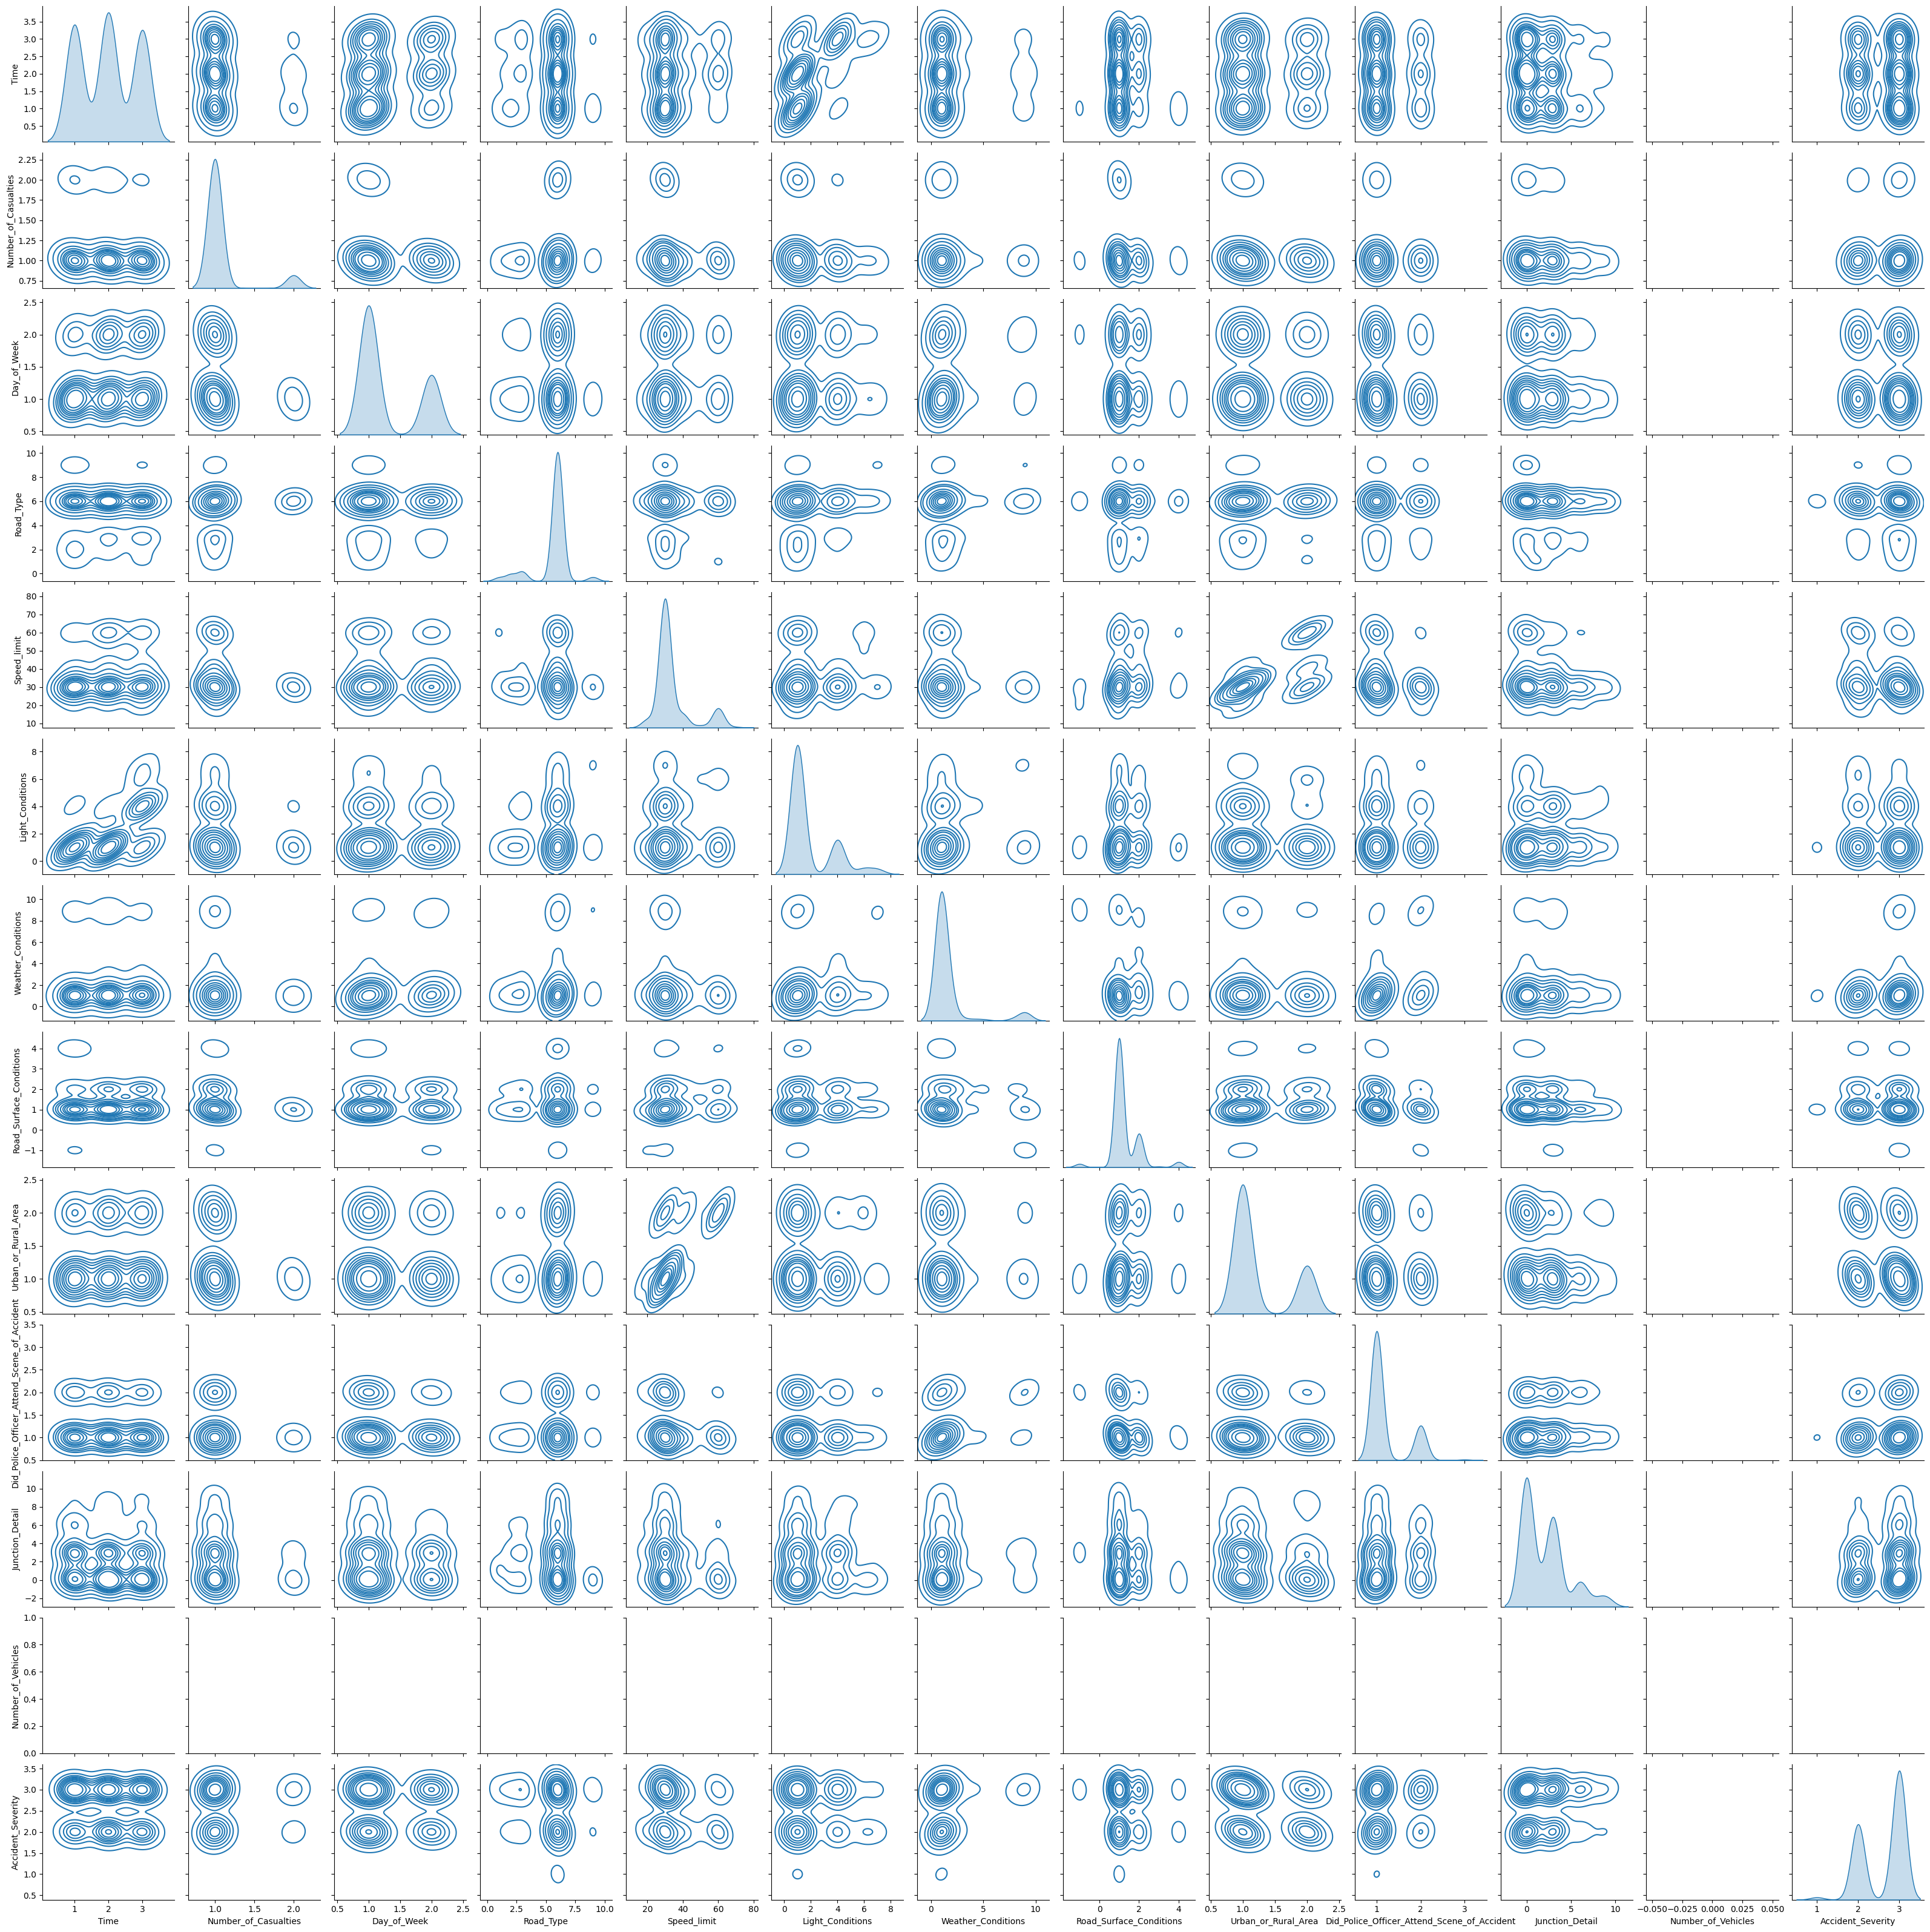

In [30]:
# Correlacion entre las variables
sns.pairplot(data = df_roads.sample(frac=0.05), kind = 'kde')

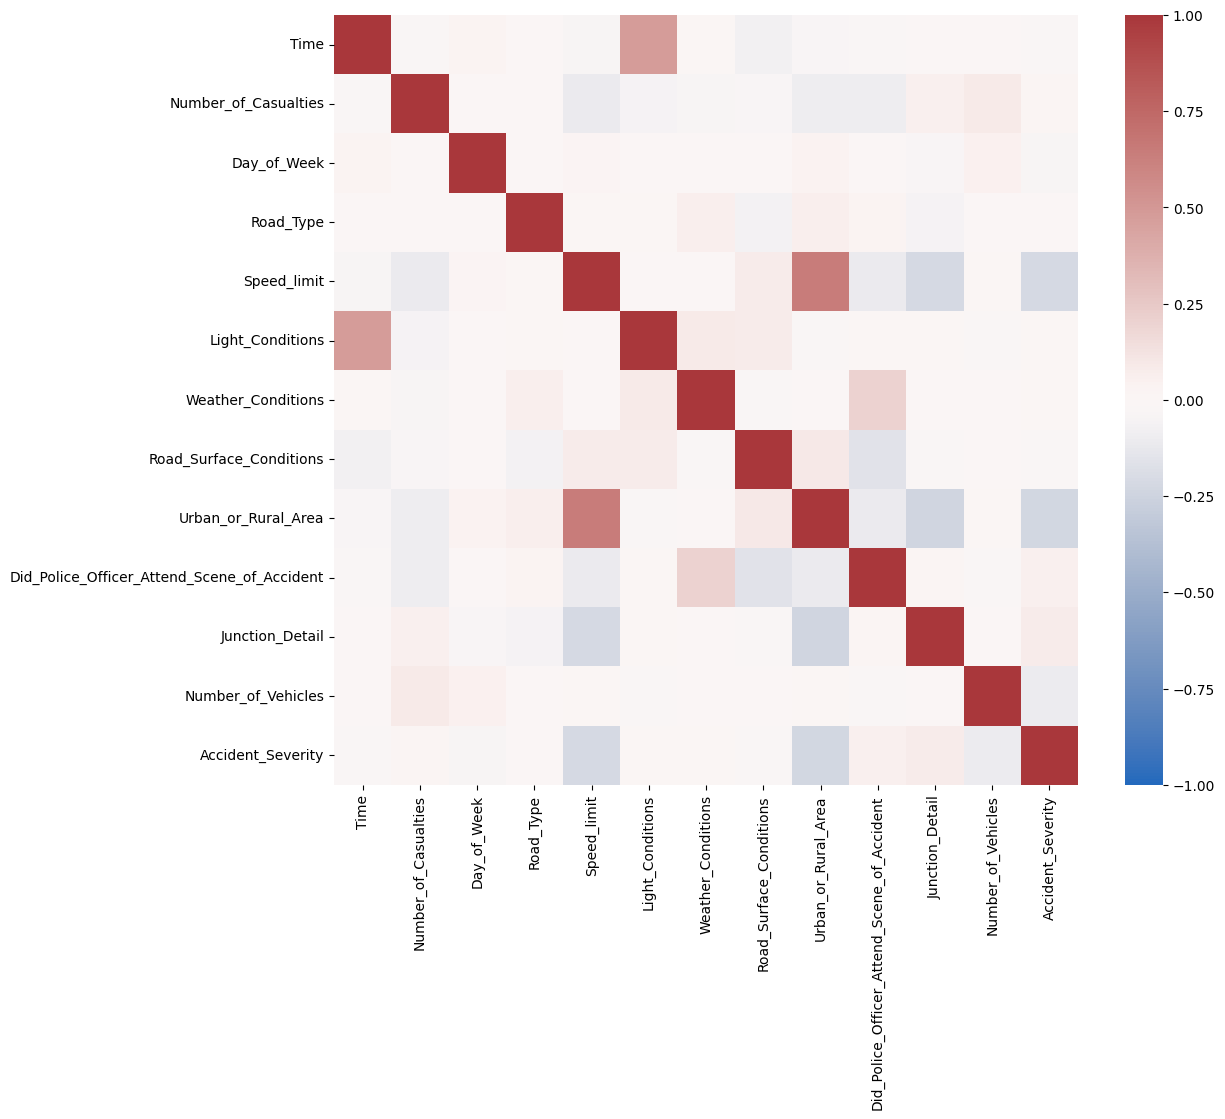

In [31]:
# Interacción entre las variables
fig = plt.figure(figsize = (12, 10))
sns.heatmap(df_roads.corr(), cmap = 'vlag', vmin = -1, vmax = 1)
plt.show()

<AxesSubplot: xlabel='Road_Type'>

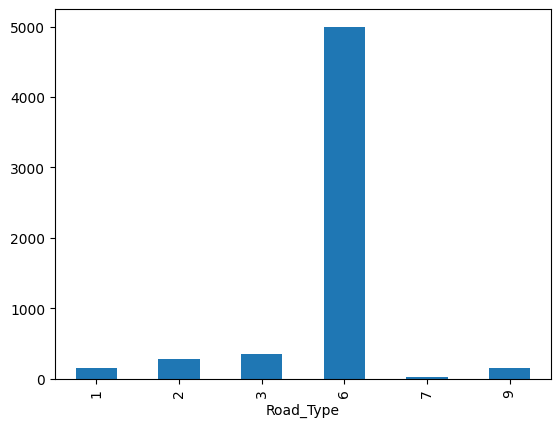

In [32]:
# Cuántos accidentes hay por tipo de carretera
df_roads.groupby('Road_Type')['Number_of_Casualties'].sum().plot(kind='bar')

<AxesSubplot: xlabel='Weather_Conditions'>

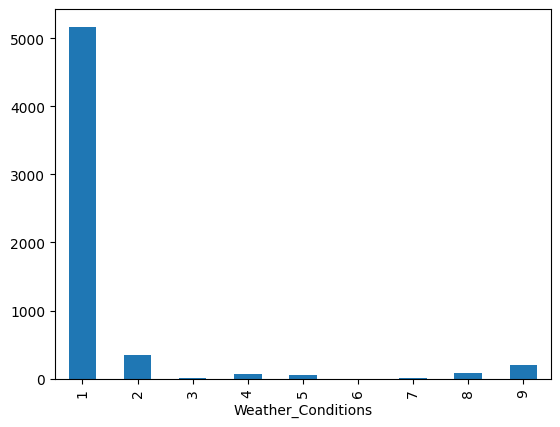

In [33]:
df_roads.groupby('Weather_Conditions')['Number_of_Casualties'].sum().plot(kind='bar')

In [34]:
df_roads['Day_of_Week'].groupby(df_roads['Urban_or_Rural_Area']).value_counts()

Urban_or_Rural_Area  Day_of_Week
1                    1              2942
                     2              1082
2                    1               888
                     2               405
Name: Day_of_Week, dtype: int64

In [35]:
df_roads['Did_Police_Officer_Attend_Scene_of_Accident'].groupby(df_roads['Weather_Conditions']).value_counts()

Weather_Conditions  Did_Police_Officer_Attend_Scene_of_Accident
1                   1                                              3592
                    2                                               981
                    3                                                27
2                   1                                               246
                    2                                                74
                    3                                                 1
3                   1                                                 9
                    2                                                 3
4                   1                                                46
                    2                                                13
5                   1                                                39
                    2                                                 7
6                   1                                                 1


In [36]:
df_roads.columns

Index(['Time', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail',
       'Number_of_Vehicles', 'Accident_Severity'],
      dtype='object')

In [37]:
features = ['Time', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type','Speed_limit', 'Light_Conditions', 'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail','Number_of_Vehicles', 'Accident_Severity']
scaler = StandardScaler()
X = scaler.fit_transform(df_roads[features])

In [38]:
X

array([[-1.24899022, -0.35738475, -0.62309763, ...,  0.44900098,
        -0.03361147,  0.71262765],
       [-1.24899022, -0.35738475, -0.62309763, ..., -0.77339443,
        -0.03361147,  0.71262765],
       [ 0.04932474, -0.35738475,  1.60488494, ...,  0.44900098,
        -0.03361147,  0.71262765],
       ...,
       [ 0.04932474, -0.35738475, -0.62309763, ...,  0.44900098,
        -0.03361147, -1.21661941],
       [ 1.34763969, -0.35738475, -0.62309763, ...,  1.67139639,
        -0.03361147,  0.71262765],
       [-1.24899022, -0.35738475, -0.62309763, ..., -0.77339443,
        -0.03361147, -1.21661941]])

In [39]:
X.shape

(5317, 13)

## 3.1. Clusterización inicial

In [40]:
n_clusters = range(3,51)

In [50]:
kmeans_inertias = []

In [51]:
for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 4, n_init='auto')
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

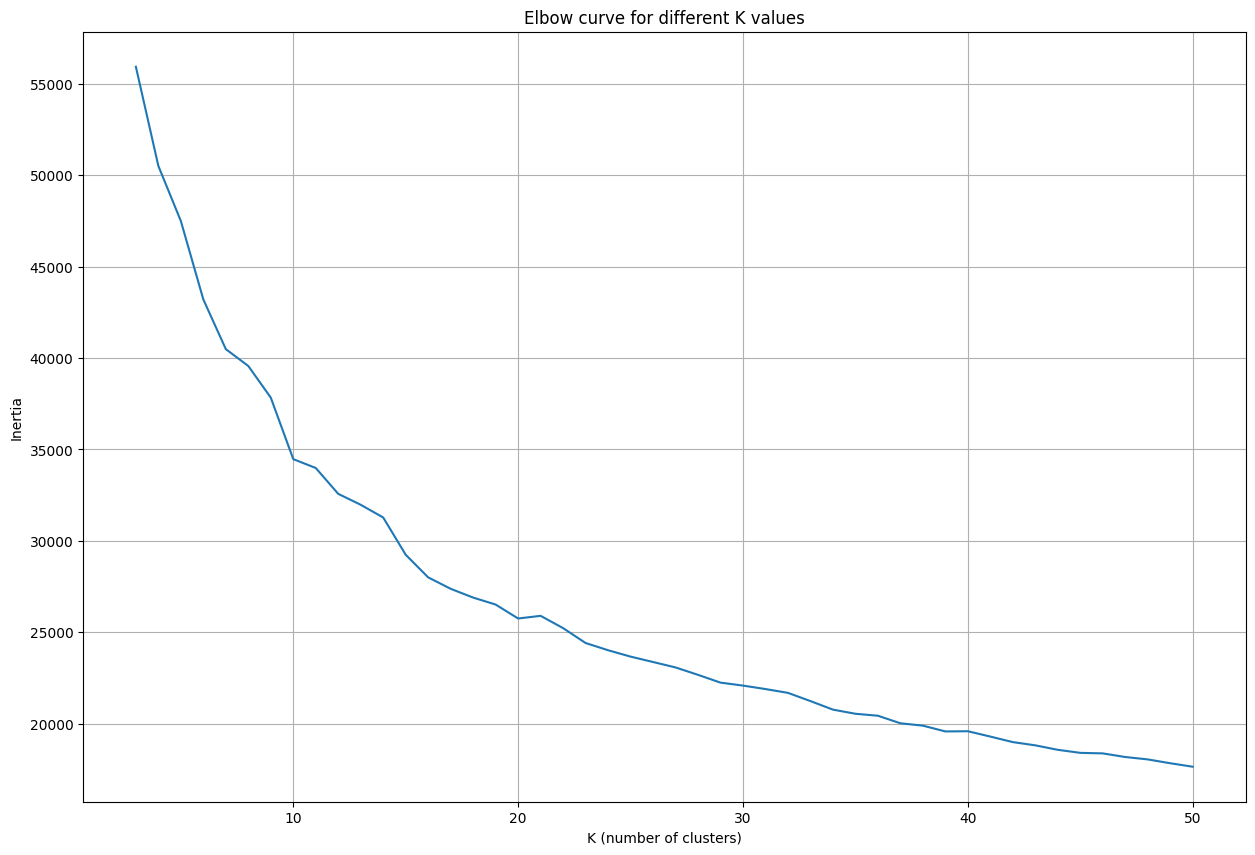

In [52]:
fig = plt.figure(figsize = (15, 10))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [60]:
def plot_silhouette(X, n_clusters, random_state = 0):
    for n in n_clusters:
        kmeans_ = KMeans(n_clusters = n, random_state = random_state, n_init='auto')
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 10 , the average silhouette score is : 0.14639703340408824
For n_clusters = 20 , the average silhouette score is : 0.17234027085044915
For n_clusters = 30 , the average silhouette score is : 0.19950278861755055
For n_clusters = 40 , the average silhouette score is : 0.21982730596653252
For n_clusters = 50 , the average silhouette score is : 0.24240365800776265


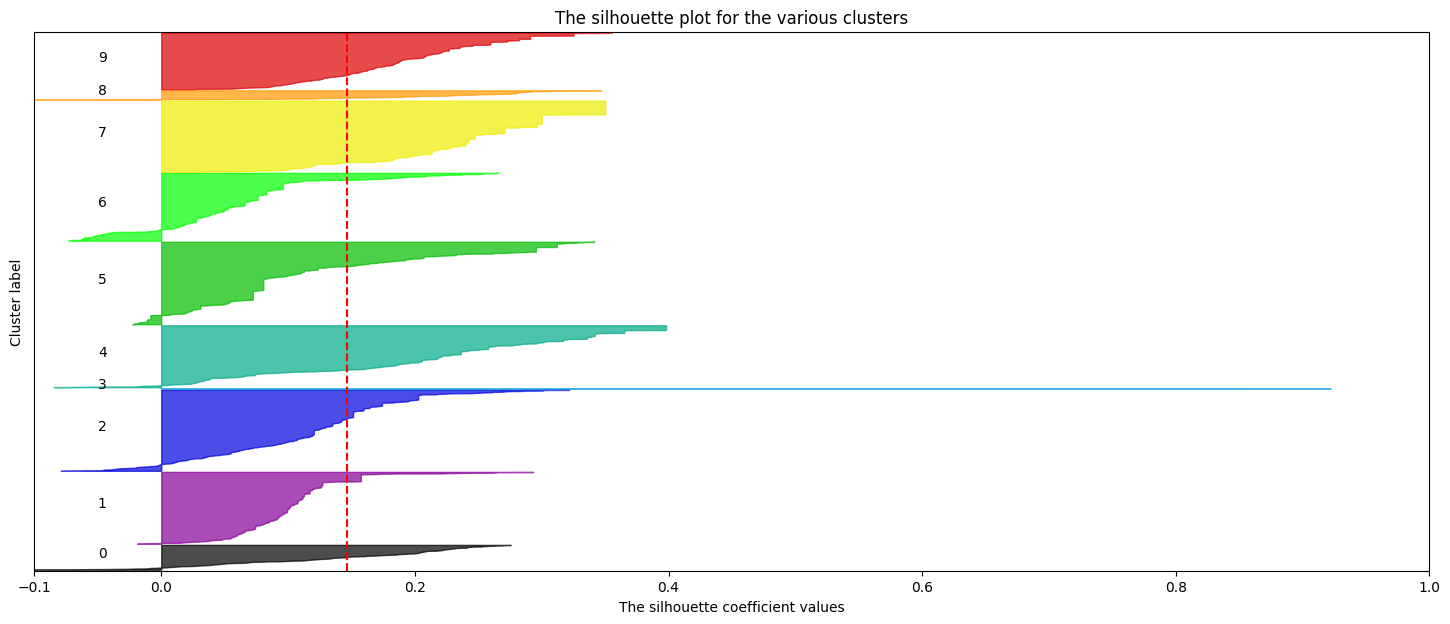

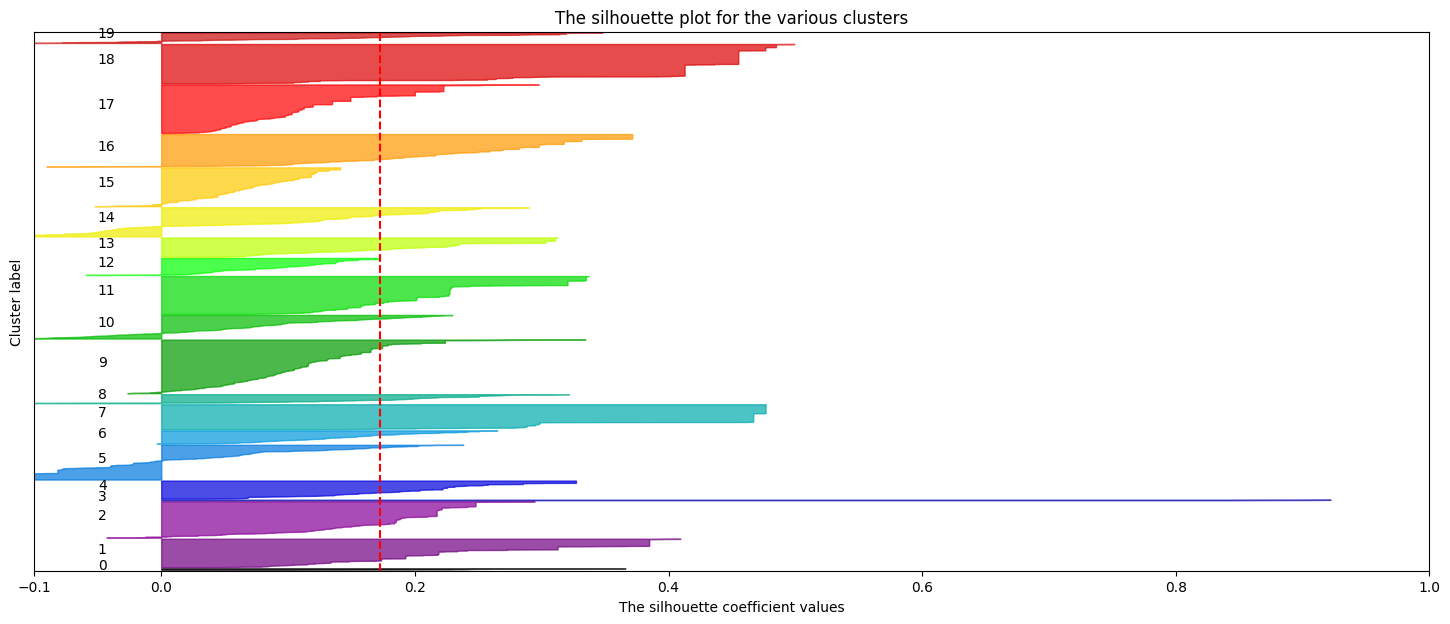

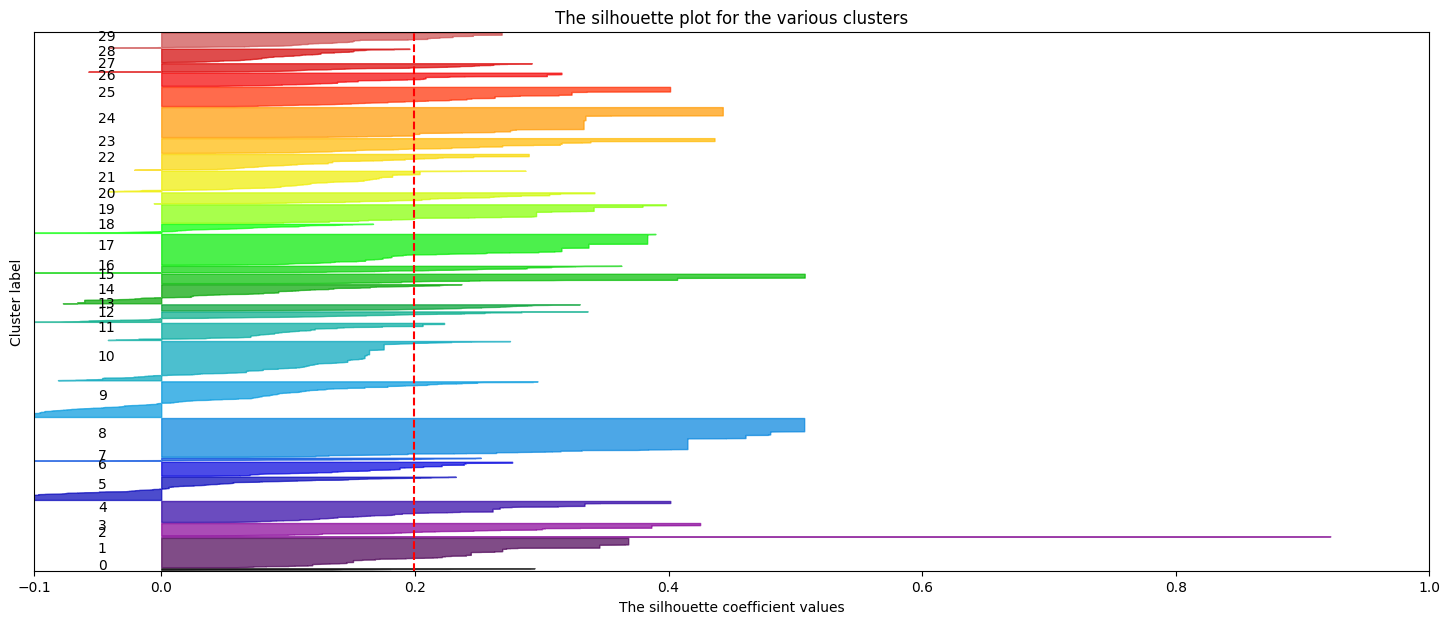

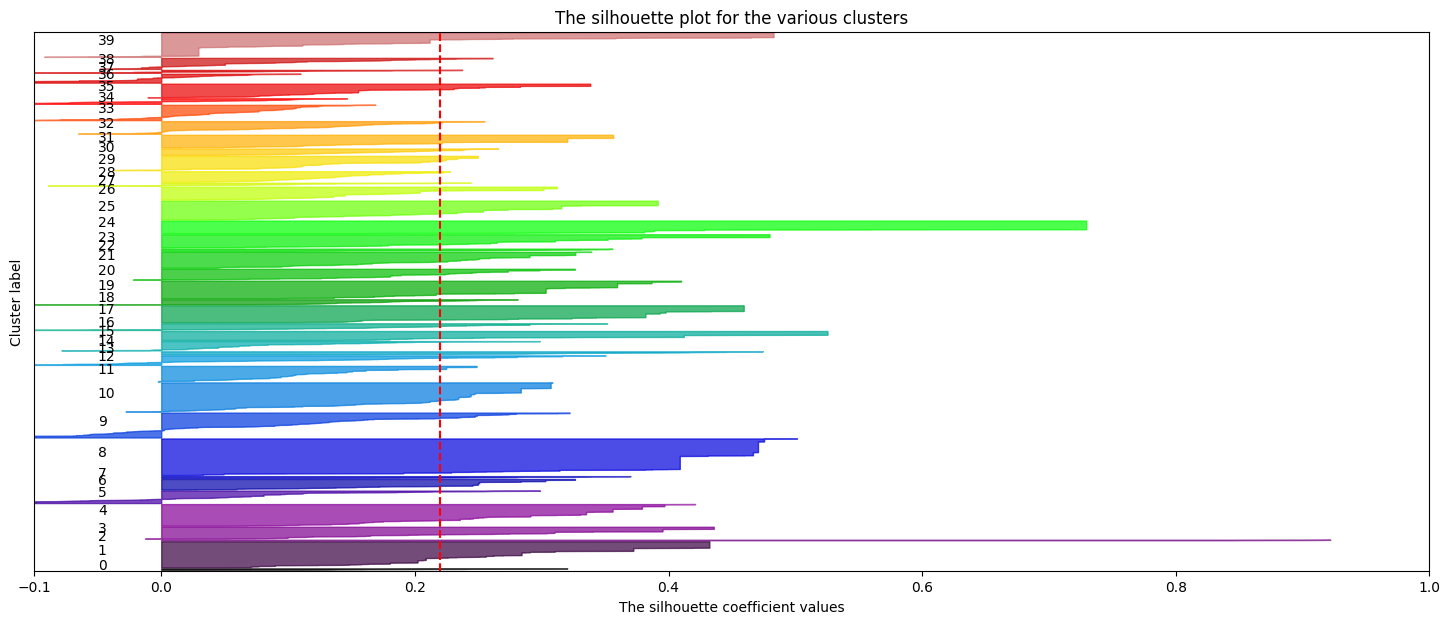

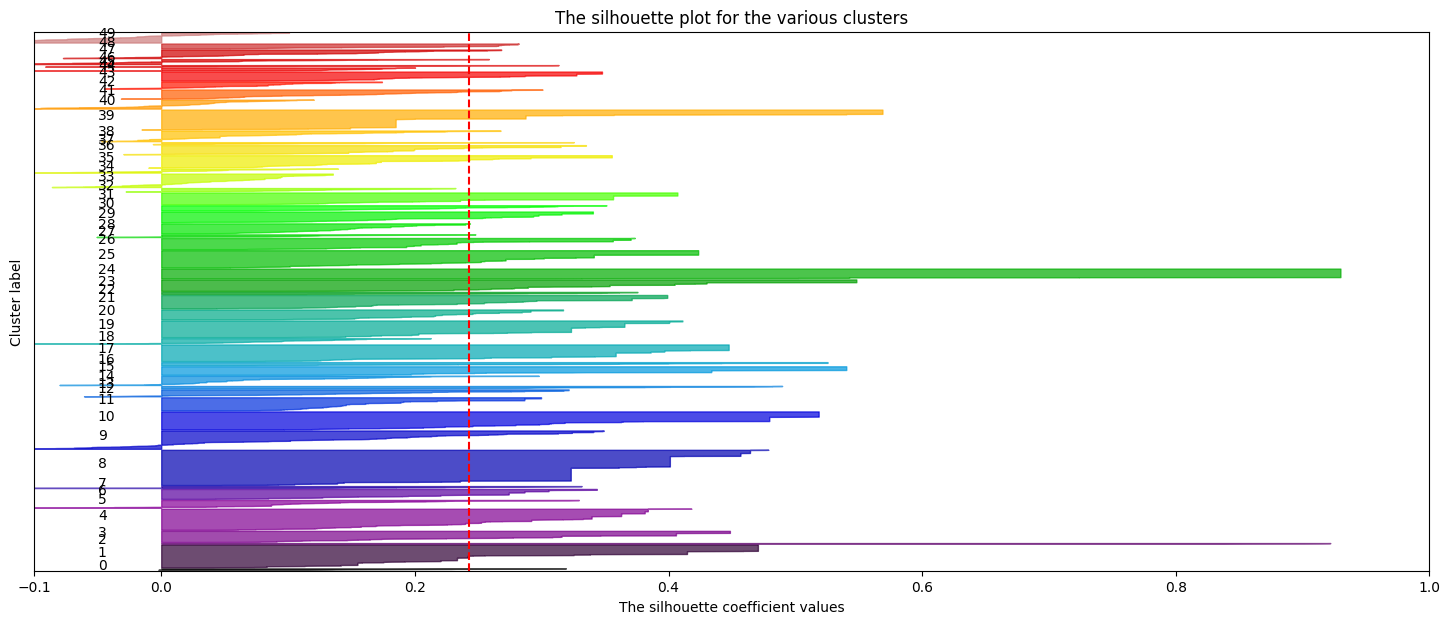

In [63]:
plot_silhouette(X, list(range(10,51,10)), random_state = 4)

In [65]:
df_roads['cluster'] = kmeans_.fit_predict(X)

In [66]:
df_roads

Time  Number_of_Casualties  Day_of_Week  Road_Type  Speed_limit  \
0        1                     1            1          6         30.0   
1        1                     1            1          6         30.0   
2        2                     1            2          6         30.0   
3        2                     2            1          6         30.0   
4        1                     2            1          6         30.0   
...    ...                   ...          ...        ...          ...   
5333     2                     1            1          6         20.0   
5334     3                     2            1          6         30.0   
5335     2                     1            1          6         30.0   
5336     3                     1            1          6         30.0   
5337     1                     1            1          3         70.0   

      Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                    1                   1                        1   
1                    1                   1                        1   
2                    1                   1                        1   
3                    1                   1                        1   
4                    1                   1                        1   
...                ...                 ...                      ...   
5333                 1                   1                        2   
5334                 1                   1                        1   
5335                 4                   5                        2   
5336                 1                   1                        1   
5337                 1                   1                        1   

      Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                       1                                            1   
1                       1                                            1   
2                       1                                            1   
3                       1                                            1   
4                       1                                            1   
...                   ...                                          ...   
5333                    1                                            1   
5334                    2                                            2   
5335                    1                                            2   
5336                    1                                            1   
5337                    1                                            2   

      Junction_Detail  Number_of_Vehicles  Accident_Severity  cluster  
0                   3                   1                  3       39  
1                   0                   1                  3       24  
2                   3                   1                  3       19  
3                   6                   1                  2       14  
4                   6                   1                  3       14  
...               ...                 ...                ...      ...  
5333                9                   1                  3       49  
5334                0                   1                  2       42  
5335                3                   1                  2       33  
5336                6                   1                  3        8  
5337                0                   1                  2       46  

[5317 rows x 14 columns]